In [1]:
from matplotlib.pyplot import *
from matplotlib import pyplot
import math
from scipy.optimize import *
import numpy

In [2]:
pyplot.rcParams["figure.figsize"] = (20,10)

In [3]:
class Section:
    
    def __init__(self,mode):
        self.mode = mode
        self.A_right = [0]*AcuityNumber
        self.A_total = [0]*AcuityNumber
        self.A_percent = [0]*AcuityNumber
        self.delay_dict_list = []
        self.delay_repeat = 0
        self.delay_percent_list = []
        self.delay_dict = {}
        self.dir_dict = {}
        
    def calcul_percent(self):
        for i in range(0,len(self.A_total)):
            if self.A_total[i] != 0:
                self.A_percent[i] = self.A_right[i] / self.A_total[i]
                
    def calcul_delay(self):
        itera = 0
        for delay_dict in self.delay_dict_list:
            self.delay_percent_list.append({})
            for elem in delay_dict:
                print(self.delay_dict_list[itera][elem])
                print(self.delay_repeat)
                self.delay_percent_list[itera][elem] = self.delay_dict_list[itera][elem] / self.delay_repeat
            itera += 1
        print("/////////")
        

In [4]:
def sigmoid1(x):
    return 1 / (1 + math.exp(-x))

In [5]:
def sigmoid2(x, a, b):
    return 0.875 / (1.0 + np.exp(-a*(x-b))) + 0.125

$$f(x) = \frac {L}{1+e^{-k(x-x_0)}} + Base$$

In [6]:
def sigmoid3(x,a,b,c):
    return c / (1.0+np.exp(-a*(x-b))) +0.125

def cur_fit(y_data):
    popt, pcov = curve_fit(sigmoid2, range(0,len(y_data)), y_data)
    tpl, = plot(range(0,len(y_data)), sigmoid2(range(0,len(y_data)), *popt))
    print(popt)
    return tpl,popt

In [7]:
def cur_fit(y_data, x_data = []):
    print(y_data)
    if(len(x_data) == 0):
        x_data = range(0,len(y_data))
    try:
        popt, pcov = curve_fit(sigmoid3, x_data, y_data)
        tpl, = plot(x_data, sigmoid3(x_data, *popt))
    except:
        ylim(-0.1, 1.1)
        popt = []
        pcov = 0
        tpl, = plot(x_data, y_data)
    print(popt)
    return tpl,popt

In [8]:
def percent_cal(k,x0,y):
    loge1dym1 = math.log((1/y)-1)
    return (loge1dym1)/(-k) + x0

In [9]:
AcuityNumber = 10
SectionNumber = 0
path_name = "./data/"
file_name = "AcuityLog_2019_08_19_10_35_08.txt"
head_file_name = "JumpLog__2019_08_19_10_35_08.txt"

In [10]:
file = open(path_name+file_name,"r")
lines = file.readlines()

In [11]:
sections = []
temp_section = None
last_delay = 100
init_delay = 0.0
itera = -1
last_DSS = -1
t_iter = 0
for line in lines:
    strings = line.split()
    if(len(strings) > 3):
        if(strings[1] == "start"):
            if(temp_section != None):
                sections.append(temp_section)
            temp_section = Section(strings[4])
            itera = -1
        else:
            try:
                AZ = int(strings[3])
            except:
                AZ = -100
            if(AZ>=0):
                temp_section.A_total[AZ] += 1
                if(last_delay == init_delay and itera == 0):
                    temp_section.delay_repeat += 1
                if(not strings[5] in temp_section.dir_dict):
                    temp_section.dir_dict[strings[5]] = (0,0)
                if(strings[4] == "True"):
                    temp_section.delay_dict[last_DSS] = (last_delay,1)
                    temp_section.A_right[AZ] += 1
                    if(len(temp_section.delay_dict_list) > 0):
                        if(not last_delay in temp_section.delay_dict_list[-1].keys()):
                            temp_section.delay_dict_list[-1][last_delay] = 1
                        else:
                            temp_section.delay_dict_list[-1][last_delay] += 1
                    temp_section.dir_dict[strings[5]] = (temp_section.dir_dict[strings[5]][0] + 1, temp_section.dir_dict[strings[5]][1] + 1)
                else:
                    temp_section.delay_dict[last_DSS] = (last_delay,0)
                    temp_section.dir_dict[strings[5]] = (temp_section.dir_dict[strings[5]][0], temp_section.dir_dict[strings[5]][1] + 1)
            elif(AZ == -2):
                if(float(strings[4]) < last_delay):
                    itera += 1
                    temp_section.delay_dict_list.append({})
                last_delay = float(strings[4])
                last_DSS = strings[1]
                if(temp_section.delay_repeat == 0):
                    init_delay = float(strings[4])
if(temp_section != None):
    sections.append(temp_section)

for section in sections:
    section.calcul_percent()
    
for section in sections:
    section.calcul_delay()
    

7
9
8
9
7
9
8
9
6
9
9
9
9
9
8
9
9
9
8
9
/////////
2
9
4
9
4
9
7
9
7
9
7
9
9
9
8
9
9
9
9
9
/////////


In [12]:
def draw_dir_bar(dir_dict):
    dir_dict = sorted(dir_dict.items())
    print(dir_dict)
    keys, RWTT = zip(*(dir_dict))
    RW,TT = zip(*(RWTT))
    percect = np.divide(RW,TT)
    pyplot.bar(keys,RW,width = -0.4 ,align='edge')
    pyplot.bar(keys,TT,width = 0.4 ,align='edge')
    pyplot.grid(axis = 'y')
    pyplot.savefig("./results/"+file_name[:-4]+"_DIR"+"0"+".png")
    pyplot.show()
    pyplot.bar(keys,percect,width = 0.4 ,align='center')
    pyplot.grid(axis = 'y')
    pyplot.savefig("./results/"+file_name[:-4]+"_DIR"+"1"+".png")
    
#draw_dir_bar(sections[-1].dir_dict)

In [13]:
head_arr = []
head_turn_arr = []
def read_head():
    file = open(path_name+head_file_name,"r")
    lines = file.readlines()
    for line in lines:
        strings = line.split()
        if(len(strings) > 4):
            if(strings[4] == "head_stop"):
                head_arr.append(int(strings[2]))
            elif(strings[4] == "head_turned"):
                head_turn_arr.append(int(strings[2]))
read_head()         
print(head_arr)
print(len(head_arr))
print(head_turn_arr)
print(len(head_turn_arr))

[1782599, 1785753, 1789332, 1792386, 1796299, 1799366, 1802886, 1806599, 1809859, 1825319, 1828286, 1831352, 1834512, 1837465, 1840572, 1843698, 1846578, 1850072, 1853518, 1857826, 1861472, 1864779, 1867685, 1871671, 1875224, 1878991, 1883057, 1886824, 1890657, 1894664, 1898437, 1902097, 1905257, 1908531, 1911624, 1915204, 1919317, 1923464, 1927170, 1930870, 1934123, 1937170, 1940817, 1945016, 1948297, 1951550, 1955450, 1959056, 1962583, 1966410, 1969616, 1973303, 1976776, 1979983, 1983663, 1987456, 1991436, 1994669, 1998843, 2002349, 2005823, 2009549, 2013269, 2016722, 2020102, 2023629, 2027402, 2030842, 2034842, 2038322, 2041889, 2045222, 2049082, 2052849, 2056082, 2059868, 2063575, 2067222, 2071355, 2074395, 2078508, 2083462, 2087488, 2090888, 2094448, 2097908, 2102114, 2105881, 2109854, 2114121]
90
[1782293, 1785513, 1789047, 1792206, 1796053, 1799112, 1802633, 1806346, 1809592, 1824999, 1828032, 1831039, 1834145, 1837192, 1840452, 1843459, 1846306, 1849819, 1853145, 1857465, 18610

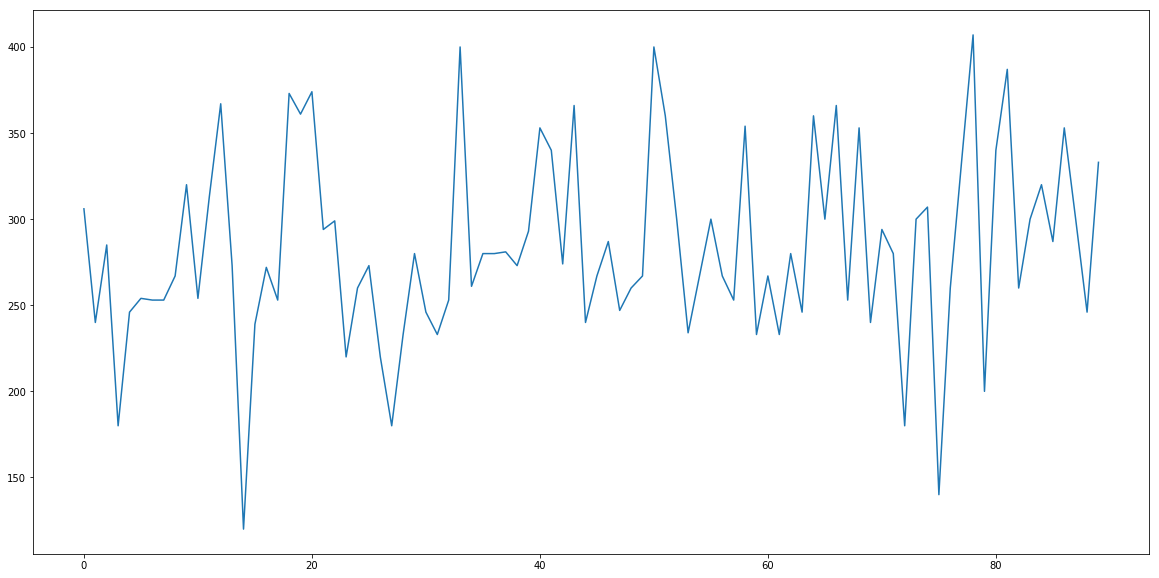

In [14]:
head_TTS = np.subtract(head_arr,head_turn_arr)
plot(range(0,len(head_arr)),head_TTS)
pyplot.savefig("./results/"+file_name[:-4]+"_HT"+"1"+".png")

In [15]:
HDrange = 1.0 / (1/960)
#SS, RW, HD
HD_arr = []

def head_delay(section,head_ar):
    for head in head_ar:
        for delay in section.delay_dict.keys():
            if(abs(head - int(delay)) <= HDrange):
                HD_arr.append((int(delay) - head,section.delay_dict[delay][1],
                               section.delay_dict[delay][0]))
                break

                
head_delay(sections[SectionNumber],head_arr)
#HD_arr.sort(key = lambda tup: tup[0])
print(HD_arr)
print(len(HD_arr))

[(-293, 1, 0.0), (-234, 1, 0.0), (-279, 0, 0.0), (-173, 1, 0.0), (-240, 1, 0.0), (-247, 1, 0.0), (-247, 1, 0.0), (-240, 0, 0.0), (-253, 1, 0.0), (-240, 1, 0.08), (-174, 1, 0.08), (-233, 1, 0.08), (-287, 1, 0.08), (-193, 1, 0.08), (-40, 1, 0.08), (-160, 1, 0.08), (-193, 0, 0.08), (-174, 1, 0.08), (-219, 1, 0.16), (-201, 1, 0.16), (-213, 1, 0.16), (-133, 1, 0.16), (-140, 1, 0.16), (-59, 1, 0.16), (-100, 0, 0.16), (-114, 0, 0.16), (-59, 1, 0.16), (60, 1, 0.24), (0, 1, 0.24), (-40, 1, 0.24), (-6, 1, 0.24), (0, 1, 0.24), (-13, 1, 0.24), (-161, 1, 0.24), (-27, 1, 0.24), (-47, 0, 0.24), (33, 1, 0.32), (33, 0, 0.32), (40, 1, 0.32), (27, 1, 0.32), (-40, 1, 0.32), (-20, 1, 0.32), (39, 0, 0.32), (-46, 0, 0.32), (80, 1, 0.32), (120, 1, 0.4), (100, 1, 0.4), (141, 1, 0.4), (127, 1, 0.4), (120, 1, 0.4), (-13, 1, 0.4), (26, 1, 0.4), (87, 1, 0.4), (153, 1, 0.4), (200, 1, 0.48), (166, 1, 0.48), (200, 1, 0.48), (214, 1, 0.48), (120, 1, 0.48), (234, 1, 0.48), (199, 1, 0.48), (233, 1, 0.48), (187, 1, 0.48)

In [16]:
head2 = numpy.array(HD_arr)
print(head2)
print(numpy.sum(head2[:,1]))
float(79) / len(HD_arr)

[[-2.93e+02  1.00e+00  0.00e+00]
 [-2.34e+02  1.00e+00  0.00e+00]
 [-2.79e+02  0.00e+00  0.00e+00]
 [-1.73e+02  1.00e+00  0.00e+00]
 [-2.40e+02  1.00e+00  0.00e+00]
 [-2.47e+02  1.00e+00  0.00e+00]
 [-2.47e+02  1.00e+00  0.00e+00]
 [-2.40e+02  0.00e+00  0.00e+00]
 [-2.53e+02  1.00e+00  0.00e+00]
 [-2.40e+02  1.00e+00  8.00e-02]
 [-1.74e+02  1.00e+00  8.00e-02]
 [-2.33e+02  1.00e+00  8.00e-02]
 [-2.87e+02  1.00e+00  8.00e-02]
 [-1.93e+02  1.00e+00  8.00e-02]
 [-4.00e+01  1.00e+00  8.00e-02]
 [-1.60e+02  1.00e+00  8.00e-02]
 [-1.93e+02  0.00e+00  8.00e-02]
 [-1.74e+02  1.00e+00  8.00e-02]
 [-2.19e+02  1.00e+00  1.60e-01]
 [-2.01e+02  1.00e+00  1.60e-01]
 [-2.13e+02  1.00e+00  1.60e-01]
 [-1.33e+02  1.00e+00  1.60e-01]
 [-1.40e+02  1.00e+00  1.60e-01]
 [-5.90e+01  1.00e+00  1.60e-01]
 [-1.00e+02  0.00e+00  1.60e-01]
 [-1.14e+02  0.00e+00  1.60e-01]
 [-5.90e+01  1.00e+00  1.60e-01]
 [ 6.00e+01  1.00e+00  2.40e-01]
 [ 0.00e+00  1.00e+00  2.40e-01]
 [-4.00e+01  1.00e+00  2.40e-01]
 [-6.00e+0

0.8777777777777778

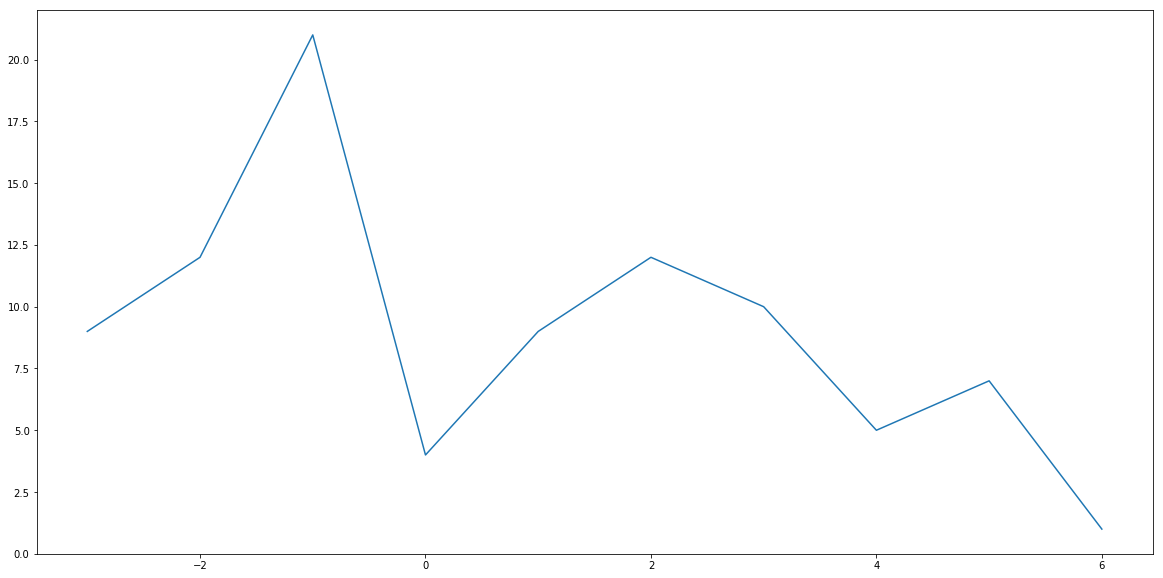

In [17]:
head1 = {}
for a in HD_arr:
    b = a[0] / 80
    b = int(b)
    if(b in head1):
        head1[b] += 1
    else:
        head1[b] = 1
    
plot([-3,-2,-1,0,1,2,3,4,5,6],head1.values())

In [18]:
H_inter = 0.08
HS_inter = H_inter * 960
print(HS_inter)
#print(HS_inter)
def cluster(HD_arr):
    index = 0
    cluster_arr = {}
    total_arr = {}
    res_arr = {}
    for HD in HD_arr:
        index = abs(HD[0]) // HS_inter
        index = (index + 1) if (HD[0] >= 0)  else (-index - 1)
        if(not index in total_arr):
            total_arr[index] = 1
        else:
            total_arr[index] += 1
        if(HD[1] == 1):
            if(not index in cluster_arr):
                cluster_arr[index] = 1
            else:
                cluster_arr[index] += 1
        else:
            if(not index in cluster_arr):
                cluster_arr[index] = 0
        for key in cluster_arr:
            res_arr[key] = cluster_arr[key] / total_arr[key]
    return res_arr

HC_dict= cluster(HD_arr)
HC_dict = sorted(HC_dict.items(), key = lambda HCD : HCD[0])
print(HC_dict)

76.8
[(-4.0, 0.8181818181818182), (-3.0, 0.9), (-2.0, 0.5), (-1.0, 0.8333333333333334), (1.0, 0.7777777777777778), (2.0, 1.0), (3.0, 1.0), (4.0, 0.9), (5.0, 0.8571428571428571), (6.0, 1.0), (7.0, 1.0)]


In [19]:
def draw_Compare_Head(cur_popts,x_array,y_array):
    Precise = 0.01
    tpl, = plot(x_array,y_array,".")
    x_min = np.amin(x_array)
    x_max = np.amax(x_array)
    cur_tpl, = plot(np.arange(x_min,x_max,Precise), sigmoid3(np.arange(x_min,x_max,Precise), *cur_popts))

index  (-4.0, -3.0, -2.0, -1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0)
index  [-0.32 -0.24 -0.16 -0.08  0.08  0.16  0.24  0.32  0.4   0.48  0.56]
res  [0.81818182 0.9        0.5        0.83333333 0.77777778 1.
 1.         0.9        0.85714286 1.         1.        ]


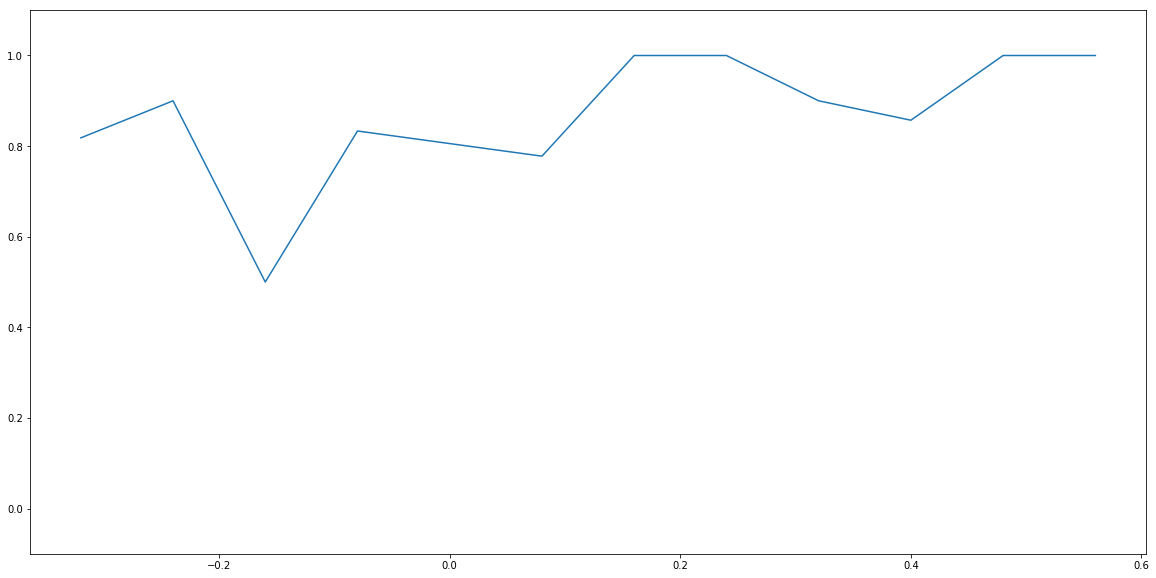

[0.81818182 0.9        0.5        0.83333333 0.77777778 1.
 1.         0.9        0.85714286 1.         1.        ]
[]


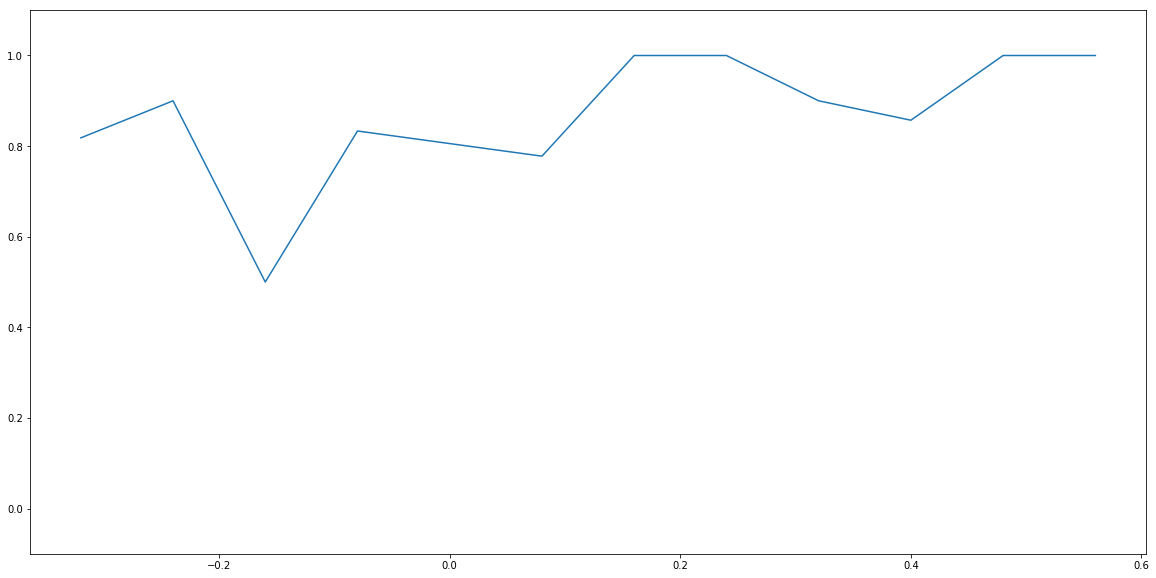

No fit


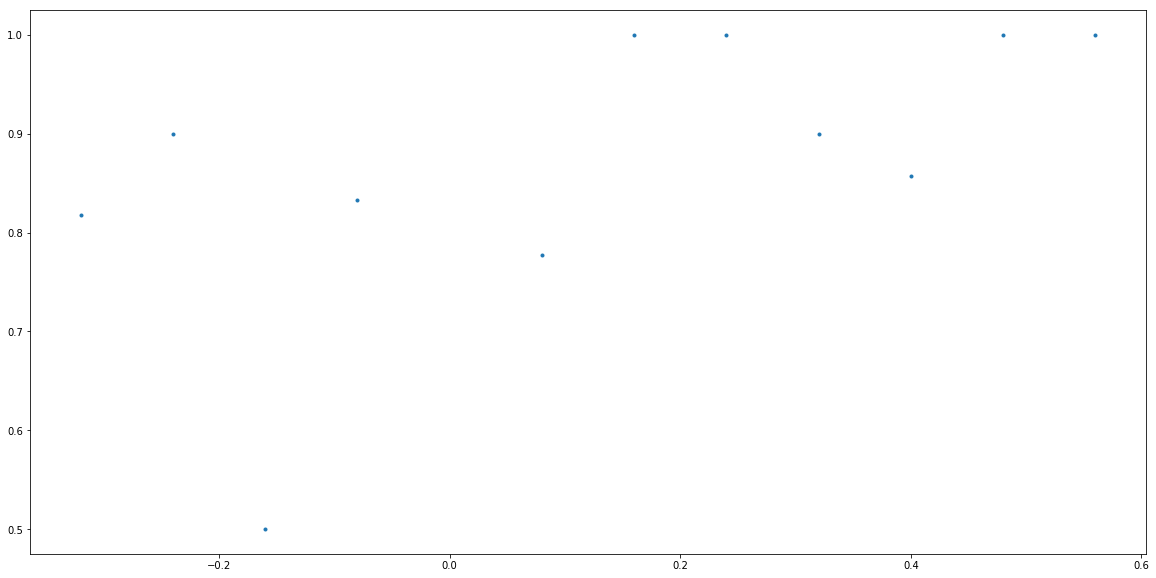

In [32]:
if(len(HC_dict) > 0):
    index, res = zip(*HC_dict)
    print("index ",index)
    index = np.asarray(index)
    res = np.asarray(res)
    index = index*H_inter
    print("index ",index)
    print("res ",res)

    ylim(-0.1,1.1)
    plot(index,res)
    pyplot.savefig("./results/"+file_name[:-4]+"_DP"+"2"+".png")
    pyplot.show()
    
    try:
        H_tpl,H_popt = cur_fit(res,x_data = index)
        pyplot.show()
        draw_Compare_Head(H_popt,index,res)
        pyplot.show()
    except:
        print("No fit")

for(section in sections):
    

In [21]:
def plot_acuity():
    i = -1
    legends = []
    plines = []
    for section in sections:
        i += 1
        tpl, = plot(range(0,AcuityNumber),sections[i].A_percent)
        plines.append(tpl)
        legends.append(sections[i].mode)
    #legends[-1] = "GazeShft"
    pyplot.legend(legends)
    #plines[0].remove()

In [22]:
for delay in sections[SectionNumber].delay_percent_list:
    print(delay.keys(),delay.values())

dict_keys([0.0, 0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.72]) dict_values([0.7777777777777778, 0.8888888888888888, 0.7777777777777778, 0.8888888888888888, 0.6666666666666666, 1.0, 1.0, 0.8888888888888888, 1.0, 0.8888888888888888])


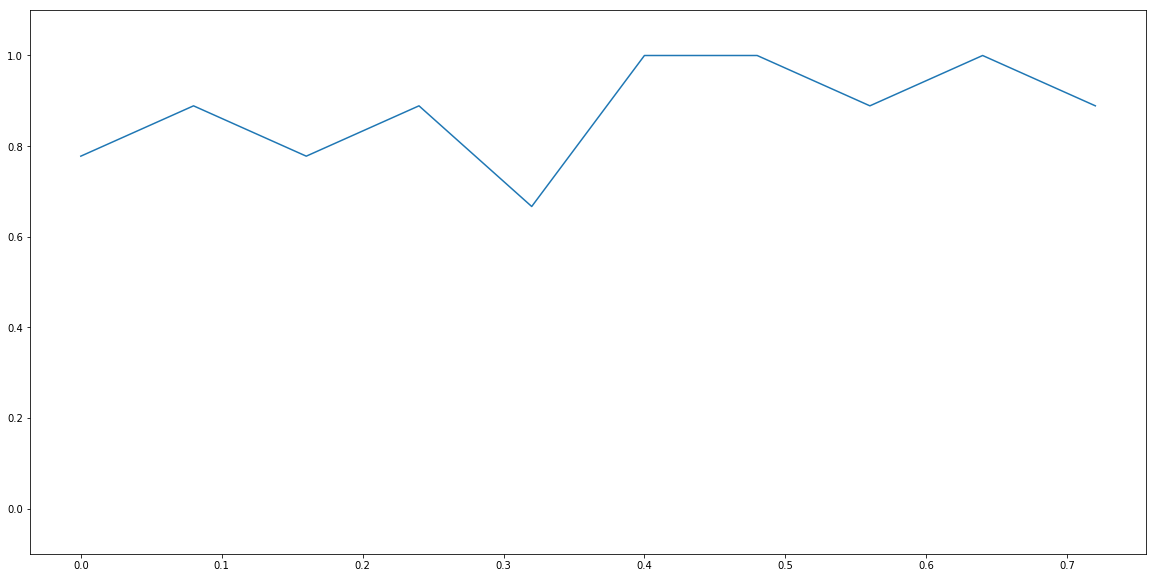

In [33]:
if(len(sections[SectionNumber].delay_percent_list) > 0):
    ylim(-0.1,1.1)
    tpl, = plot(sections[SectionNumber].delay_percent_list[0].keys(),sections[SectionNumber].delay_percent_list[0].values())
    pyplot.savefig("./results/"+file_name[:-4]+"_DP"+"1"+".png")

[0.7777777777777778, 0.8888888888888888, 0.7777777777777778, 0.8888888888888888, 0.6666666666666666, 1.0, 1.0, 0.8888888888888888, 1.0, 0.8888888888888888]
[ 0.11195534 -7.02975906  0.96584276]


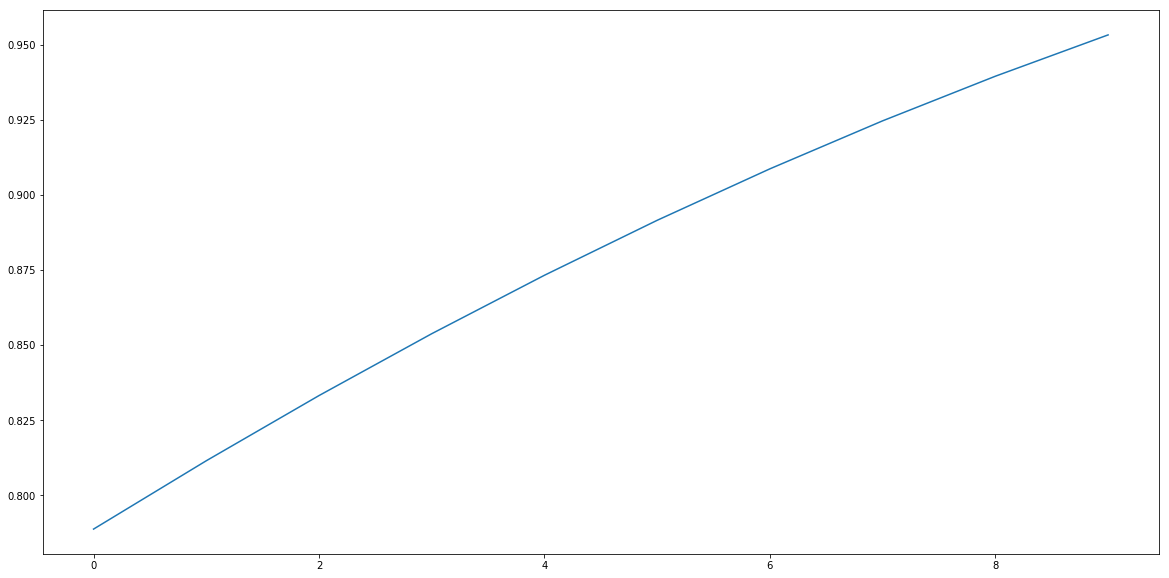

In [24]:
if(len(sections[SectionNumber].delay_percent_list) > 0):
    DF_tpl,DF_popt = cur_fit(list(sections[SectionNumber].delay_percent_list[0].values()))

In [25]:
start = 60826
end = 206593
frac = 1.0/960.0
def draw_compare_WYData(y_array,cur_popts,index):
    Precise = 0.1
    tpl, = plot(range(0,len(y_array)),y_array,".")
    cur_tpl, = plot(np.arange(0,len(y_array),Precise), sigmoid3(np.arange(0,len(y_array),Precise), *cur_popts))
#    for head_ss in head_arr:
#        if(head_ss >= start and head_ss <= end):
#            time = (head_ss - start)*frac
#            pyplot.axvline(x=time)
    pyplot.savefig("./results/"+file_name[:-4]+"_DR"+index+".png")

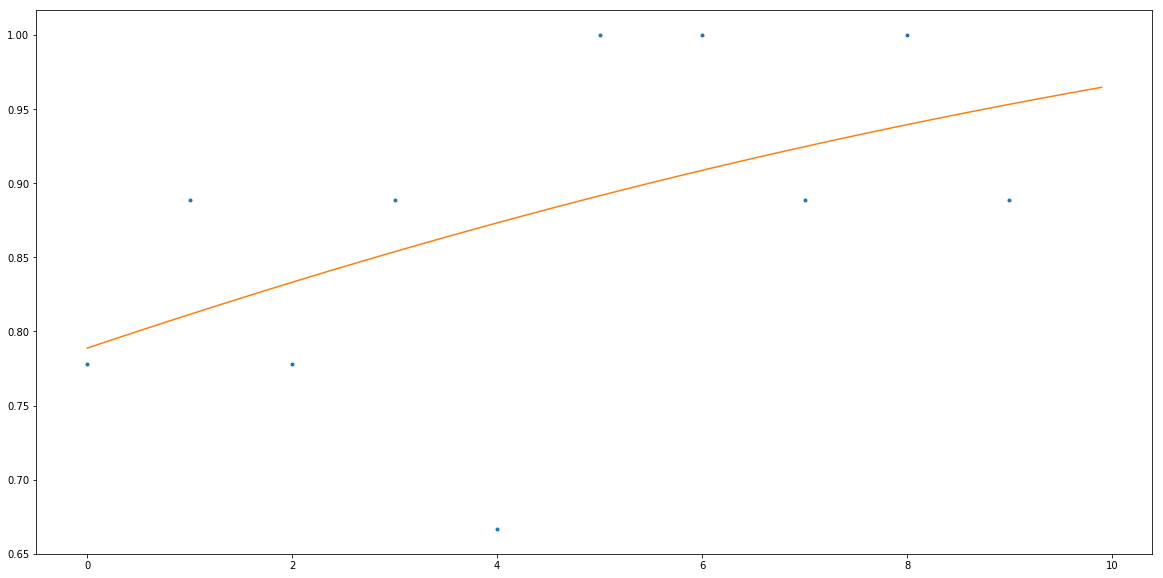

In [26]:
if(len(sections[SectionNumber].delay_percent_list) > 0):
    draw_compare_WYData(list(sections[SectionNumber].delay_percent_list[0].values()),DF_popt,"2")

In [27]:
def plot_delay():
    i = 0
    legends = []
    plines = []
    for section in sections:
        for delay in section.delay_percent_list:
            tpl, = plot(delay.keys(),delay.values())
            plines.append(tpl)
            legends.append(i)
            i += 1
    pyplot.legend(legends)

DynamicAcuity
[0, 0.8777777777777778, 0, 0, 0, 0, 0, 0, 0, 0]
[]
DynamicAcuity
[0, 0.7333333333333333, 0, 0, 0, 0, 0, 0, 0, 0]
[32.01856947  1.73024207 -0.125     ]


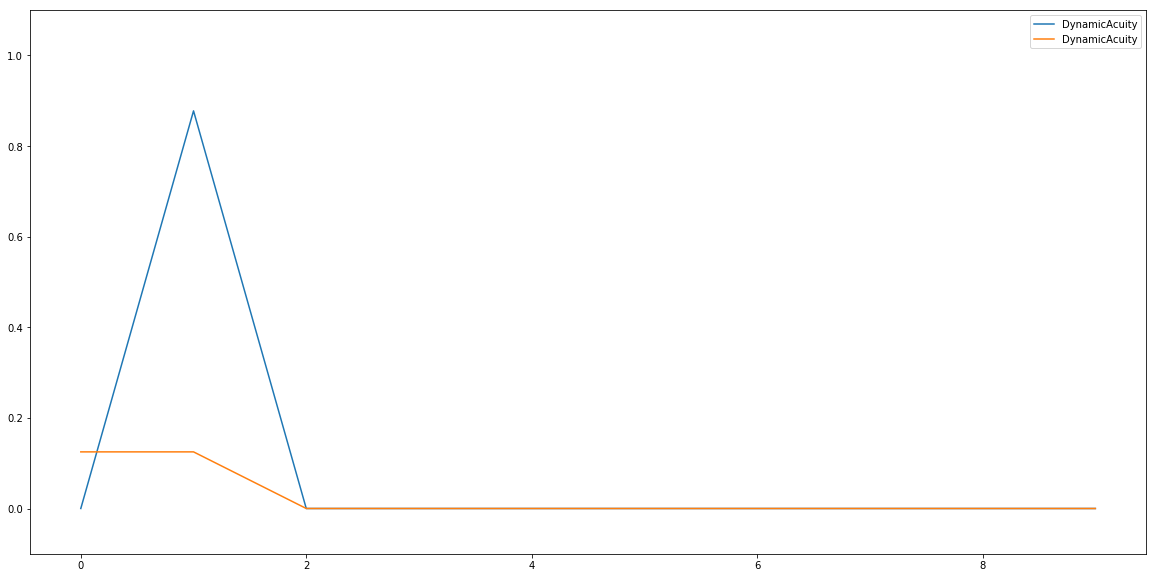

In [28]:
legends2 = []
plines = []
cur_popts = []
for section in sections:
    print(section.mode)
    legends2.append(section.mode)
    tlp,popt = cur_fit(section.A_percent)
    plines.append(tlp)
    cur_popts.append(popt)
#legends2[-1] = "GazeShft"
pyplot.legend(legends2)
#plines[0].remove()

In [29]:
Precise = 0.1

def draw_compare(index):
    tpl, = plot(range(0,AcuityNumber),sections[index].A_percent,".")
    cur_tpl, = plot(np.arange(0,len(sections[index].A_percent),Precise), sigmoid2(np.arange(0,len(sections[index].A_percent),Precise), *cur_popts[index]))
    pyplot.legend([sections[index].mode])

In [30]:
def draw_compare(index):
    tpl, = plot(range(0,AcuityNumber),sections[index].A_percent,".")
    cur_tpl, = plot(np.arange(0,len(sections[index].A_percent),Precise), sigmoid3(np.arange(0,len(sections[index].A_percent),Precise), *cur_popts[index]))
    pyplot.legend([sections[index].mode])
    pyplot.savefig("./results/"+file_name[:-4]+"_AR"+str(index)+".png")

TypeError: sigmoid3() missing 3 required positional arguments: 'a', 'b', and 'c'

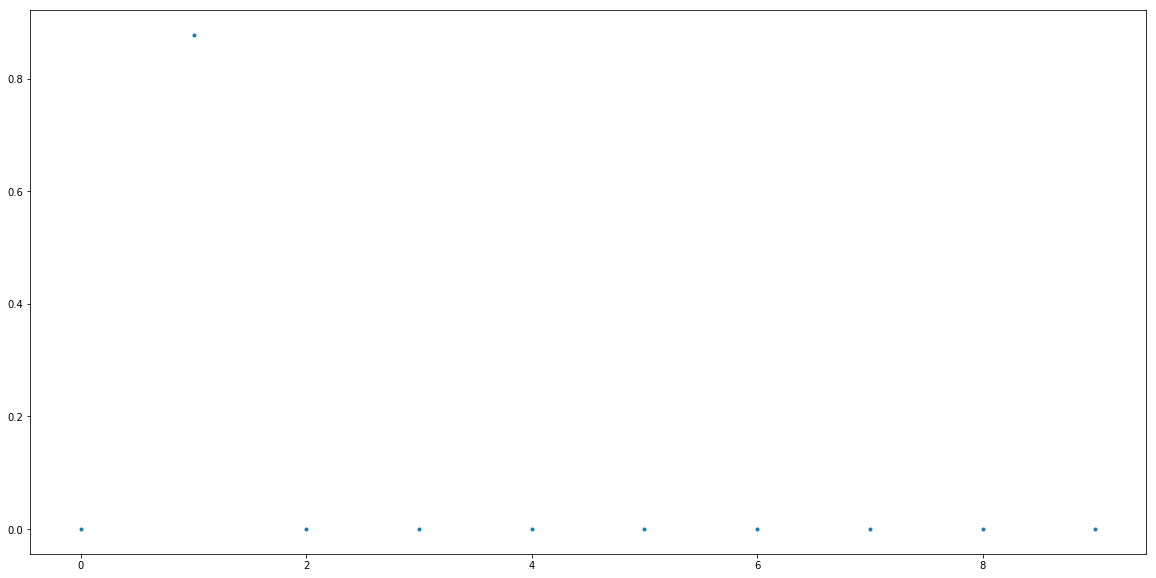

In [31]:
draw_compare(0)

In [ ]:
draw_compare(1)

In [ ]:
draw_compare(2)

In [ ]:
draw_compare(3)